# k-beauty 온라인 판매 분석

## 가설 : K-beauty는 성장하고 있는가?, 어느 국가로 판매전략이 획기적인가

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os
if os.name =='nt':
    sns.set(font='NanumGothic')

In [3]:
df = pd.read_csv('./data/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20221119152839.csv',
                 encoding='cp949')

In [4]:
df.shape

(450, 27)

In [5]:
# 국가별 빈도수 확인
df['국가(대륙)별'].value_counts()

합계            45
미국            45
중국            45
일본            45
아세안(ASEAN)    45
유럽연합(EU)      45
중동            45
중남미           45
대양주           45
기타            45
Name: 국가(대륙)별, dtype: int64

In [6]:
df.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '2014.1/4', '2014.2/4', '2014.3/4',
       '2014.4/4', '2015.1/4', '2015.2/4', '2015.3/4', '2015.4/4', '2016.1/4',
       '2016.2/4', '2016.3/4', '2016.4/4', '2017.1/4', '2017.2/4', '2017.3/4',
       '2017.4/4', '2018.1/4', '2018.2/4', '2018.3/4', '2018.4/4', '2019.1/4',
       '2019.2/4', '2019.3/4', '2019.4/4'],
      dtype='object')

In [7]:
df = df.melt(id_vars=['국가(대륙)별','상품군별','판매유형별'], var_name='기간', value_name='백만원')
df.shape

(10800, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  10800 non-null  object
 1   상품군별     10800 non-null  object
 2   판매유형별    10800 non-null  object
 3   기간       10800 non-null  object
 4   백만원      10800 non-null  object
dtypes: object(5)
memory usage: 422.0+ KB


In [9]:
# 기간에서 연도 분리
df['연도'] = df['기간'].map(lambda x:int(x.split('.')[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도
0,합계,합계,계,2014.1/4,148272,2014
1,합계,합계,면세점,2014.1/4,-,2014
2,합계,합계,면세점 이외,2014.1/4,-,2014
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915,2014
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,-,2014


In [10]:
df['분기'] = df['기간'].map(lambda x : int(x.split('.')[1].split('/')[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014.1/4,148272,2014,1
1,합계,합계,면세점,2014.1/4,-,2014,1
2,합계,합계,면세점 이외,2014.1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,-,2014,1


In [11]:
df['백만원'] = df['백만원'].replace('-', np.nan).astype(float)
df['백만원']

0        148272.0
1             NaN
2             NaN
3          4915.0
4             NaN
           ...   
10795         0.0
10796       531.0
10797      1094.0
10798         1.0
10799      1093.0
Name: 백만원, Length: 10800, dtype: float64

In [12]:
df = df[(df['국가(대륙)별'] != '합계') & (df['상품군별'] != '합계')]
df.shape

(9072, 7)

In [13]:
df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
백만원        3024
연도            0
분기            0
dtype: int64

In [16]:
# 시각화, 전체 상품군 판매액
df_total =df[df['판매유형별'] == '계']
df_total.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014.1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014.1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014.1/4,47.0,2014,1
57,미국,서 적,계,2014.1/4,962.0,2014,1
60,미국,사무·문구,계,2014.1/4,25.0,2014,1


<AxesSubplot:xlabel='연도', ylabel='백만원'>

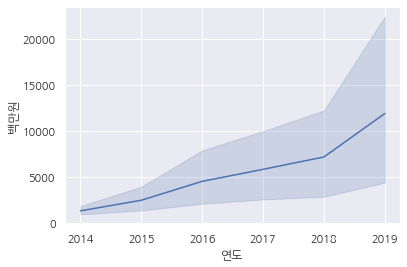

In [17]:
# 연도, 판매액 lineplot 그리기
sns.lineplot(data=df_total, x='연도',y = '백만원')

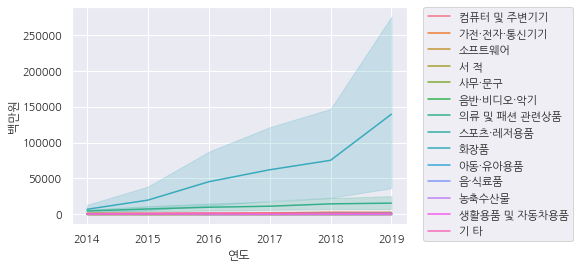

In [20]:
# 상품군별로 다른 색상으로 표시
sns.lineplot(data=df_total, x='연도',y = '백만원', hue='상품군별')
plt.legend(bbox_to_anchor = (1.05,1),loc=2, borderaxespad = 0.)

- 화장품의 경우 2014년부터 꾸준히 큰폭으로 증가세를 나타내고 있다

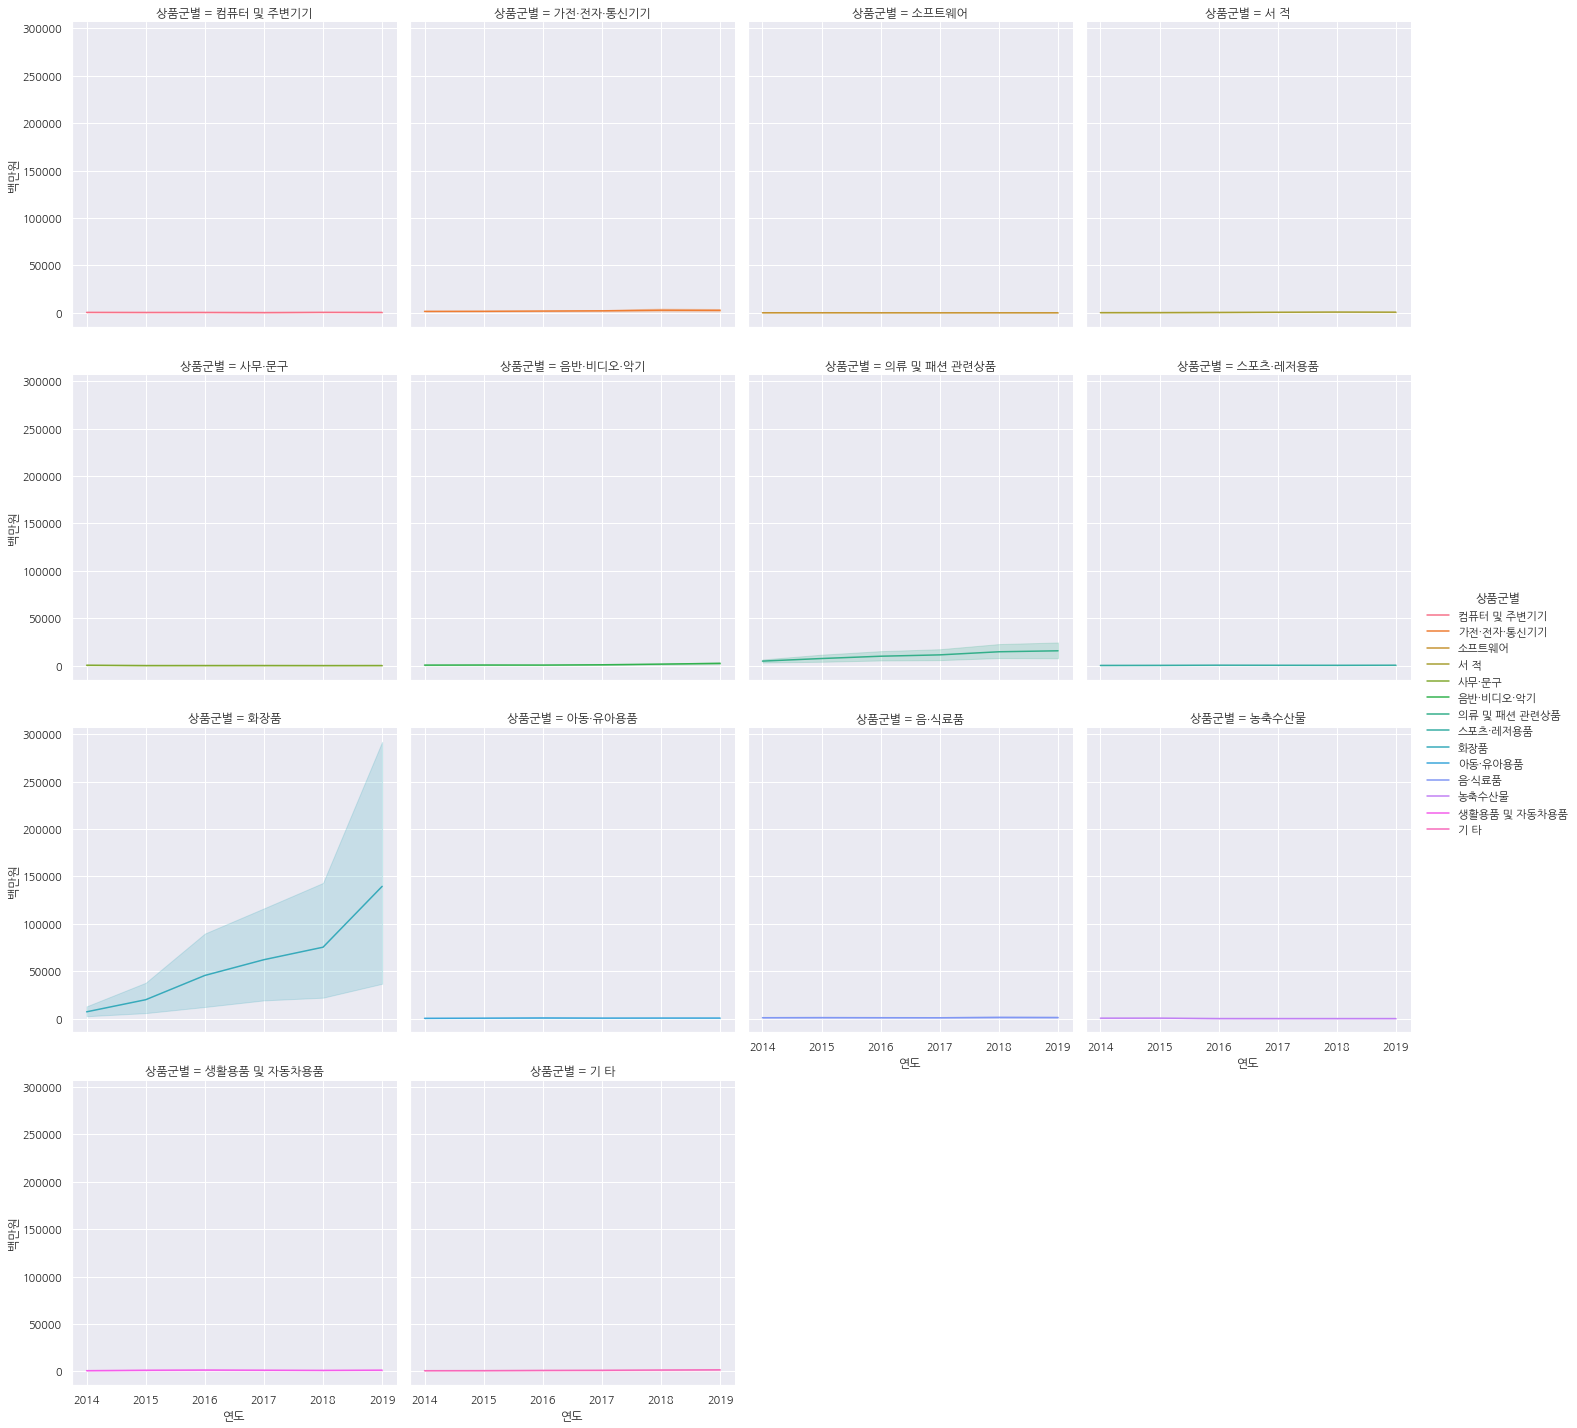

In [23]:
# 서브플롯으로 그리기
sns.relplot(data=df_total, x='연도', y='백만원',hue='상품군별',
            kind='line', col='상품군별',col_wrap=4)

In [25]:
df_sub = df_total[~df_total['상품군별'].isin(['화장품'])].copy()

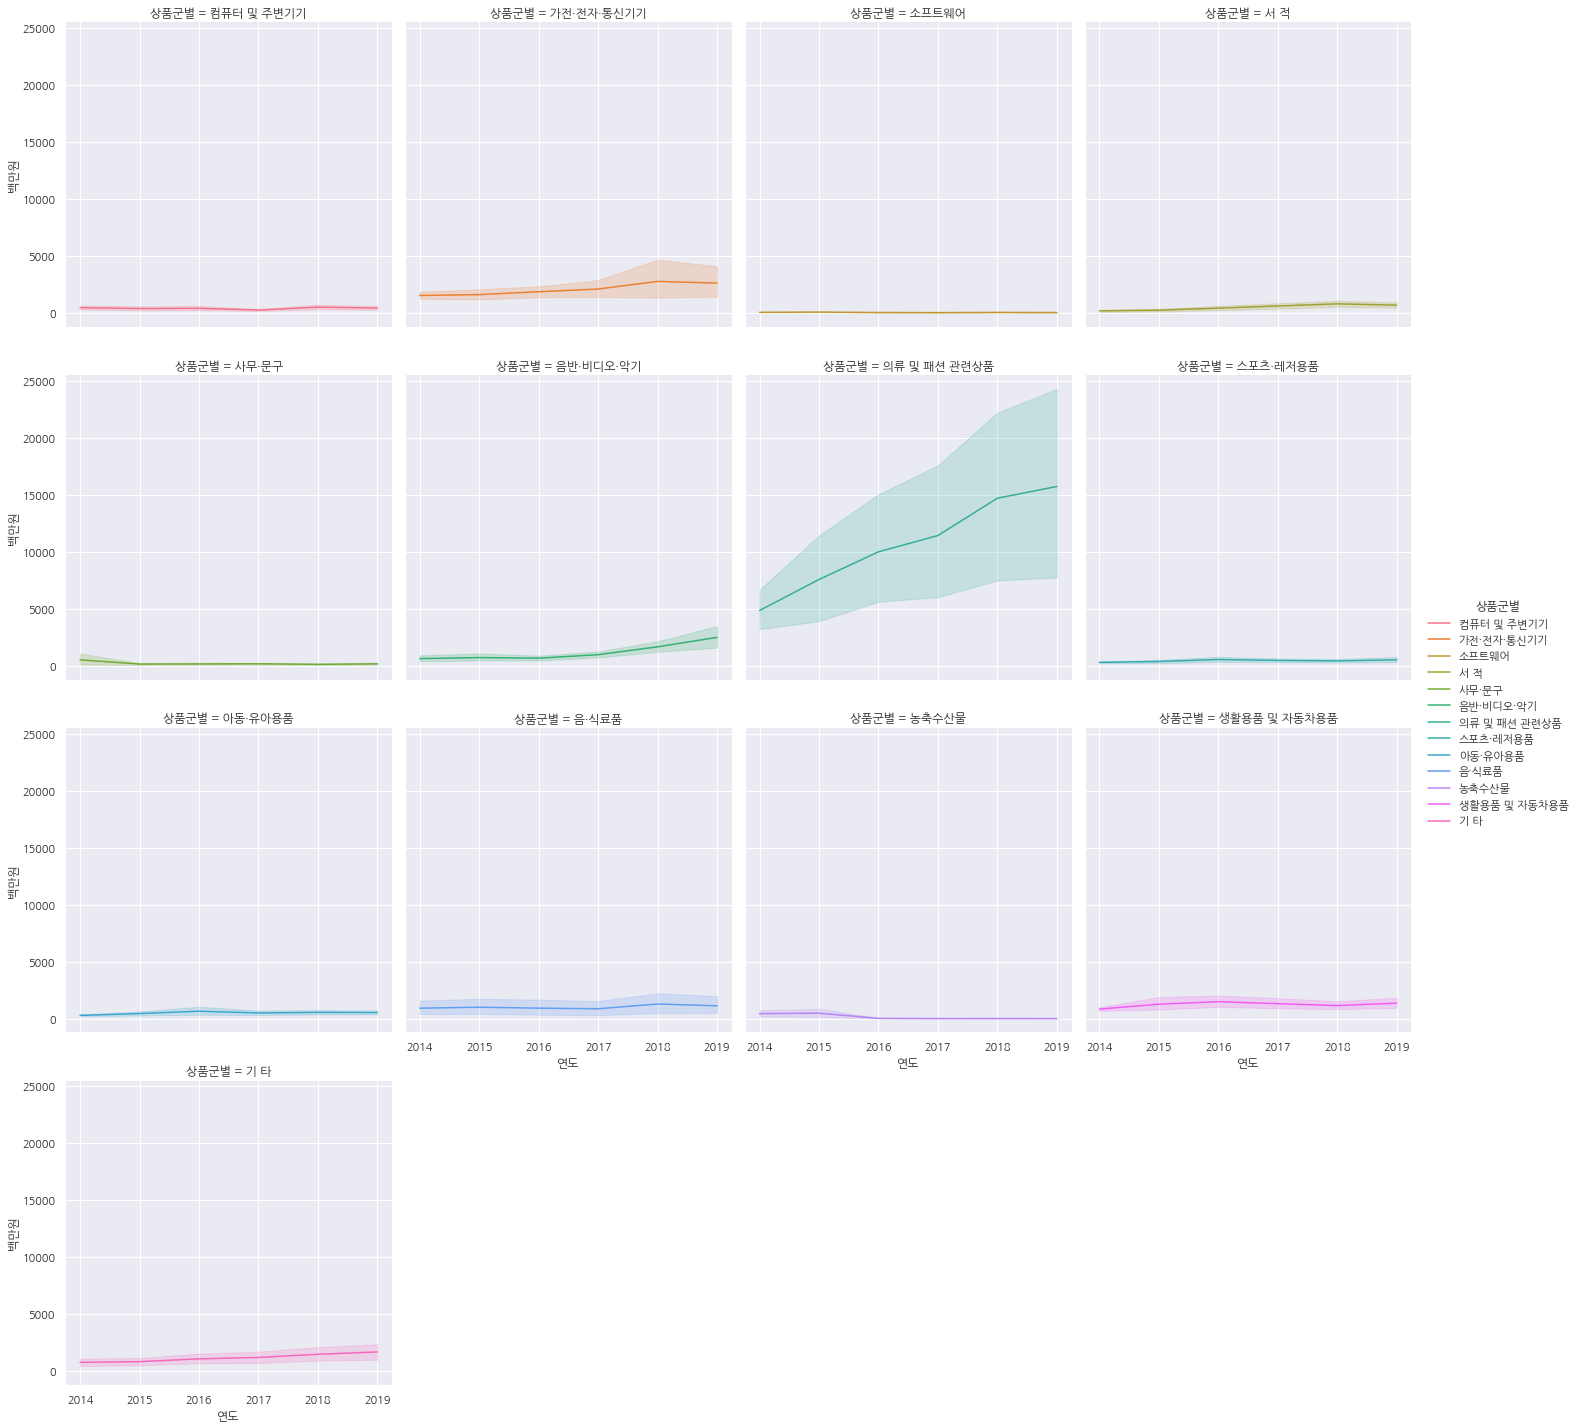

In [28]:
sns.relplot(data=df_sub, x='연도',y='백만원', hue='상품군별',
            col='상품군별',col_wrap=4, kind='line')

In [29]:
# 화장품만 추출
df_cosmetic = df_total[df_total['상품군별']=='화장품'].copy()
df_cosmetic.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
72,미국,화장품,계,2014.1/4,3740.0,2014,1
117,중국,화장품,계,2014.1/4,32235.0,2014,1
162,일본,화장품,계,2014.1/4,1034.0,2014,1
207,아세안(ASEAN),화장품,계,2014.1/4,398.0,2014,1
252,유럽연합(EU),화장품,계,2014.1/4,937.0,2014,1


<AxesSubplot:xlabel='연도', ylabel='백만원'>

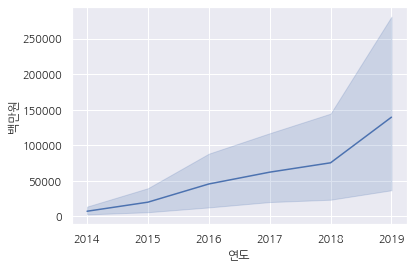

In [31]:
sns.lineplot(data=df_cosmetic, x='연도',y='백만원')

<AxesSubplot:xlabel='연도', ylabel='백만원'>

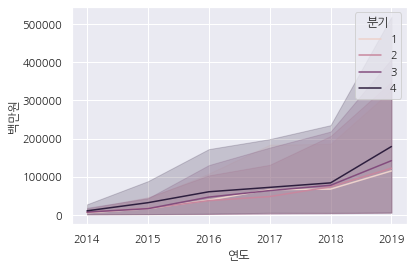

In [32]:
sns.lineplot(data=df_cosmetic, x='연도',y='백만원', hue='분기')

<AxesSubplot:xlabel='기간', ylabel='백만원'>

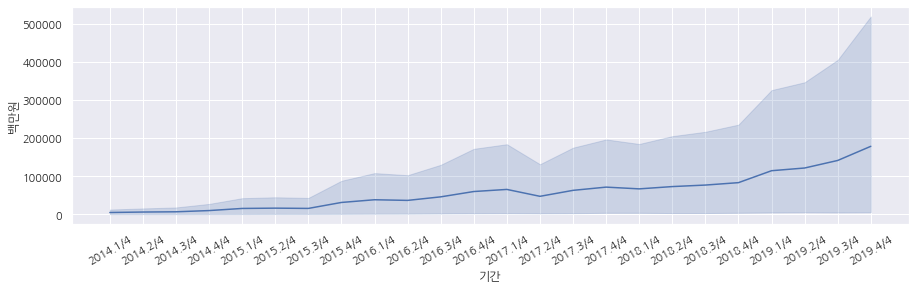

In [37]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x='기간',y='백만원')

<AxesSubplot:xlabel='기간', ylabel='백만원'>

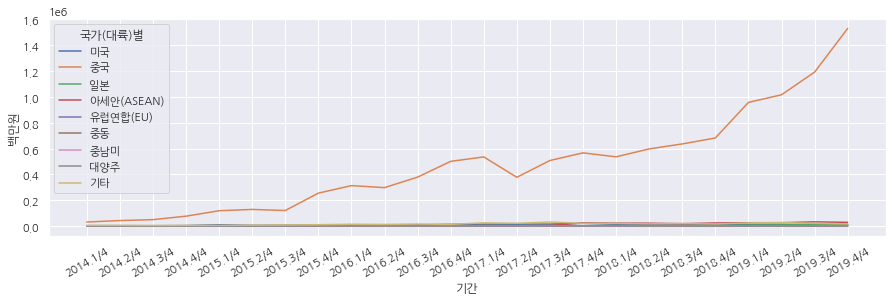

In [36]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x='기간',y='백만원', hue='국가(대륙)별')

- 중국 판매량이 타 국가에 비해 엄청 많은 것을 확인할 수 있음.
- 중국 판매량은 매 기간 꾸준히 상승하는 것을 확인할 수 있다.

<AxesSubplot:xlabel='기간', ylabel='백만원'>

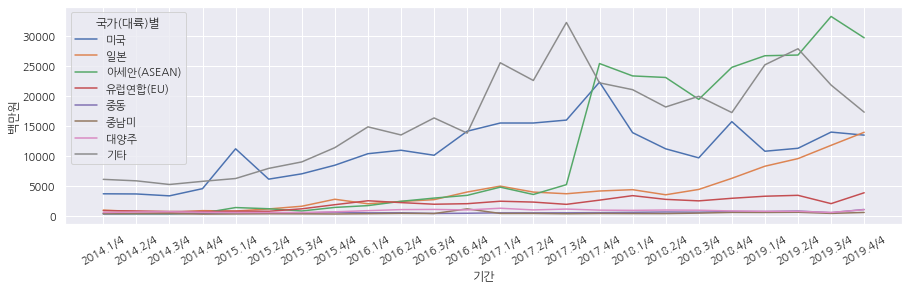

In [38]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic[df_cosmetic['국가(대륙)별']!='중국'], x='기간',y='백만원', hue='국가(대륙)별')

- 중국을 제외한 다른 국가들을 시각화 해보았을 때 미국과 중남미를 제외하고는 전체적인 성장세를 보여주고 있다

In [41]:
df_sub = df[df['판매유형별']!='계'].copy()

<AxesSubplot:xlabel='기간', ylabel='백만원'>

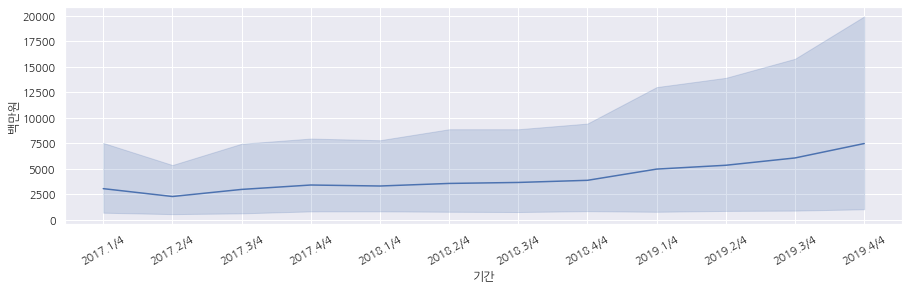

In [43]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_sub, x='기간',y='백만원')

<AxesSubplot:xlabel='기간', ylabel='백만원'>

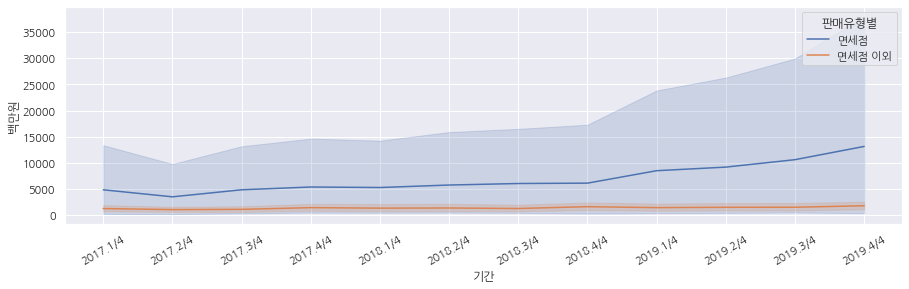

In [45]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_sub, x='기간',y='백만원',hue='판매유형별')

## 의류 및 패션 분석

In [52]:
df_fashion = df[(df['상품군별']=='의류 및 패션 관련상품') & (df['판매유형별']=='계')].copy()
df_fashion.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션 관련상품,계,2014.1/4,9810.0,2014,1
111,중국,의류 및 패션 관련상품,계,2014.1/4,12206.0,2014,1
156,일본,의류 및 패션 관련상품,계,2014.1/4,13534.0,2014,1
201,아세안(ASEAN),의류 및 패션 관련상품,계,2014.1/4,3473.0,2014,1
246,유럽연합(EU),의류 및 패션 관련상품,계,2014.1/4,1364.0,2014,1


<AxesSubplot:xlabel='기간', ylabel='백만원'>

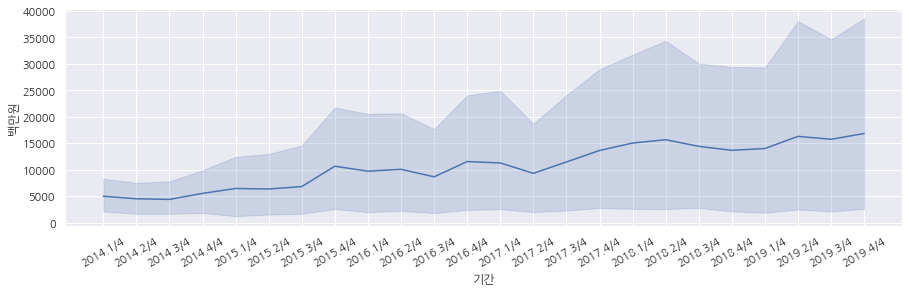

In [55]:
#기간별 금액 데이터 시각화
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x='기간',y='백만원')

- 꾸준한 성장세를 확인할 수 있다

<AxesSubplot:xlabel='기간', ylabel='백만원'>

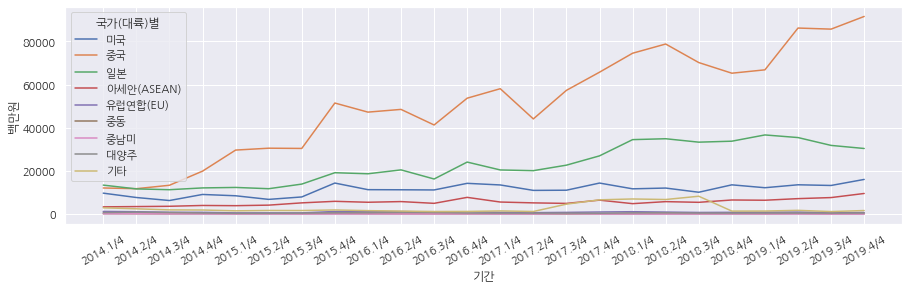

In [56]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x='기간',y='백만원', hue='국가(대륙)별')

<AxesSubplot:xlabel='기간', ylabel='백만원'>

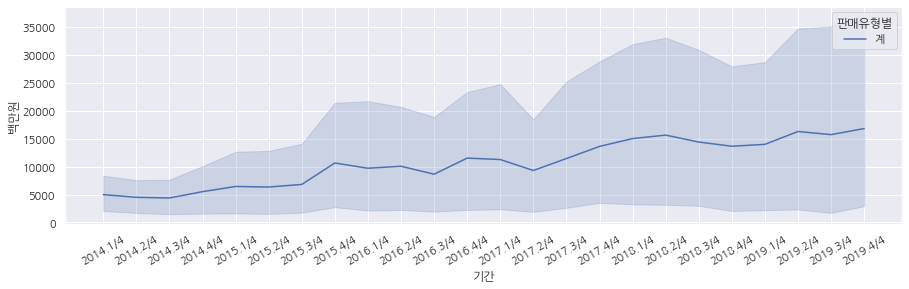

In [58]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x='기간',y='백만원', hue='판매유형별')

In [59]:
df_fashion2 = df[(df['상품군별']=='의류 및 패션 관련상품') & (df['판매유형별']!='계')].copy()
df_fashion2.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
67,미국,의류 및 패션 관련상품,면세점,2014.1/4,NaN,2014,1
68,미국,의류 및 패션 관련상품,면세점 이외,2014.1/4,NaN,2014,1
112,중국,의류 및 패션 관련상품,면세점,2014.1/4,NaN,2014,1
113,중국,의류 및 패션 관련상품,면세점 이외,2014.1/4,NaN,2014,1
157,일본,의류 및 패션 관련상품,면세점,2014.1/4,NaN,2014,1


<AxesSubplot:xlabel='기간', ylabel='백만원'>

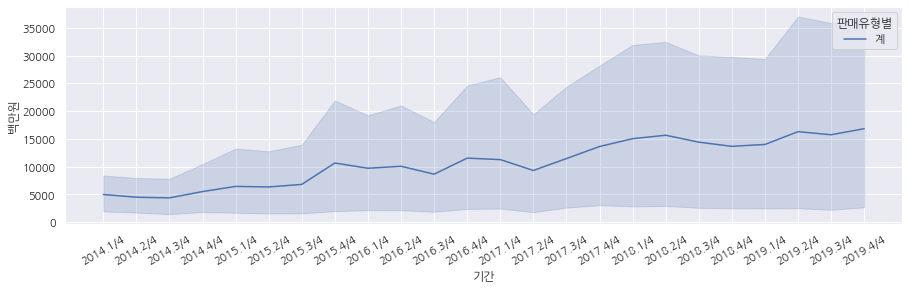

In [60]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x='기간',y='백만원', hue='판매유형별')

<AxesSubplot:xlabel='기간', ylabel='백만원'>

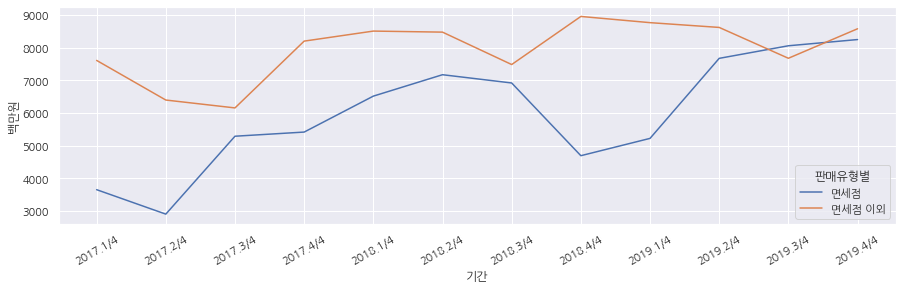

In [62]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion2, x='기간',y='백만원', hue='판매유형별', ci=None)

In [65]:
result = df_fashion.pivot_table(index='국가(대륙)별', columns='연도', values='백만원',aggfunc='sum')
result

연도,2014,2015,2016,2017,2018,2019
국가(대륙)별,,,,,,
기타,9683.0,7248.0,5918.0,14387.0,23901.0,6475.0
대양주,3392.0,2349.0,3401.0,2266.0,2725.0,2489.0
미국,33223.0,38066.0,48451.0,50353.0,47875.0,55536.0
아세안(ASEAN),14936.0,19639.0,24478.0,22671.0,23068.0,31247.0
유럽연합(EU),4485.0,3374.0,4899.0,3736.0,4114.0,3694.0
일본,48960.0,57594.0,79905.0,90584.0,136800.0,134637.0
중국,57531.0,142339.0,190932.0,225407.0,288848.0,330267.0
중남미,975.0,616.0,649.0,762.0,576.0,544.0
중동,1172.0,1018.0,968.0,772.0,879.0,951.0


<AxesSubplot:xlabel='연도', ylabel='국가(대륙)별'>

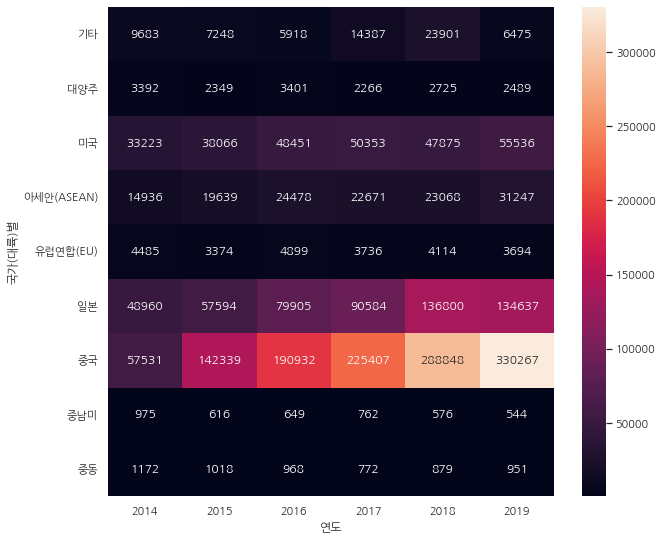

In [71]:
plt.figure(figsize=(10,9))
sns.heatmap(result, annot=True, fmt='.0f')

In [72]:
df_total.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014.1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014.1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014.1/4,47.0,2014,1
57,미국,서 적,계,2014.1/4,962.0,2014,1
60,미국,사무·문구,계,2014.1/4,25.0,2014,1


<AxesSubplot:xlabel='연도', ylabel='백만원'>

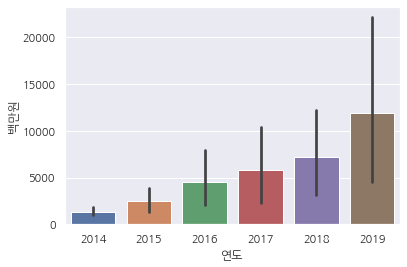

In [74]:
sns.barplot(data=df_total, x='연도',y='백만원')

<AxesSubplot:xlabel='연도', ylabel='백만원'>

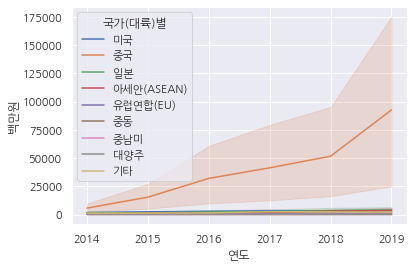

In [76]:
sns.lineplot(data=df_total, x='연도',y='백만원', hue='국가(대륙)별')